<a href="https://colab.research.google.com/github/pahwa1902/Learning/blob/master/M5_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statistics
import math
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
!ls '/content/drive/My Drive/m5-forecasting-accuracy'

In [0]:
sales_train = pd.read_csv('/content/drive/My Drive/m5-forecasting-accuracy/sales_train_validation.csv')

In [0]:
sales_train_df = pd.DataFrame(sales_train)

In [0]:
prices_train = pd.read_csv('/content/drive/My Drive/m5-forecasting-accuracy/sell_prices.csv')

In [0]:
calendar = pd.read_csv('/content/drive/My Drive/m5-forecasting-accuracy/calendar.csv')

In [0]:
calendar_train = pd.DataFrame(calendar)

In [0]:
calendar_train = calendar_train.iloc[:1913]

In [0]:
calendar_train=calendar_train.fillna(0)

In [0]:
prices_train_df = pd.DataFrame(prices_train)

In [8]:
sales_train_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [0]:
prices_train_df.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [0]:
data = sales_train_df.groupby(['state_id','store_id','cat_id','dept_id']).item_id

In [0]:
data_df = prices_train_df[prices_train_df['item_id']=='HOBBIES_1_005']

In [0]:
a = data_df[data_df['store_id']=='CA_1']['wm_yr_wk'].tolist()

In [0]:
b = data_df[data_df['store_id']=='CA_1']['sell_price'].tolist()

In [0]:
data_days=[]
for i in range(1,1914):
  data_days.append("d_"+str(i))


In [0]:
def sales(item,store):
  data_train = sales_train_df[sales_train_df['item_id']==item]
  plot_data=[]
  for i in data:
    plot_data.append(data_train[i].iloc[store])
  return plot_data

In [0]:
plot_data_copy = plot_data


In [0]:
plot_data

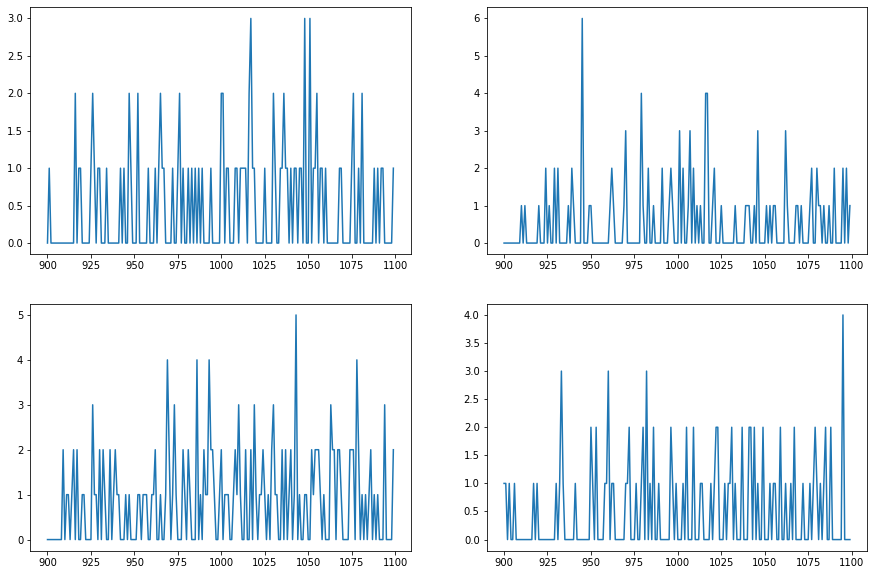

In [109]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,2,1)
ax1.plot(range(900,1100),sales("HOBBIES_1_001",0)[900:1100])
ax2 = plt.subplot(2,2,2)
ax2.plot(range(900,1100),sales("HOBBIES_1_001",1)[900:1100])
ax3 = plt.subplot(2,2,3)
ax3.plot(range(900,1100),sales("HOBBIES_1_001",2)[900:1100])
ax4 = plt.subplot(2,2,4)
ax4.plot(range(900,1100),sales("HOBBIES_1_001",3)[900:1100])

In [119]:
len(sales_train_df.columns.tolist())

1919

In [0]:
calendar_train['event_name_1'].unique().tolist()

In [0]:
b = calendar_train['event_name_2'].unique().tolist()

In [131]:
calendar_train['event_type_1'].unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [0]:
columns = ['day','sporting','cultural','National','Religious','event1','event2']

In [0]:
events_data = pd.DataFrame(columns=columns)

In [0]:
calendar_train['event_name_1'].unique()

In [0]:
data_event1 = []
for i in range(len(calendar_train)):
  if(calendar_train['event_name_1']==0).any():
    data_event1.append(0)
  if(calendar_train['event_name_1']!=1).any():
    data_event1.append(1)

In [0]:
set(data_event1)

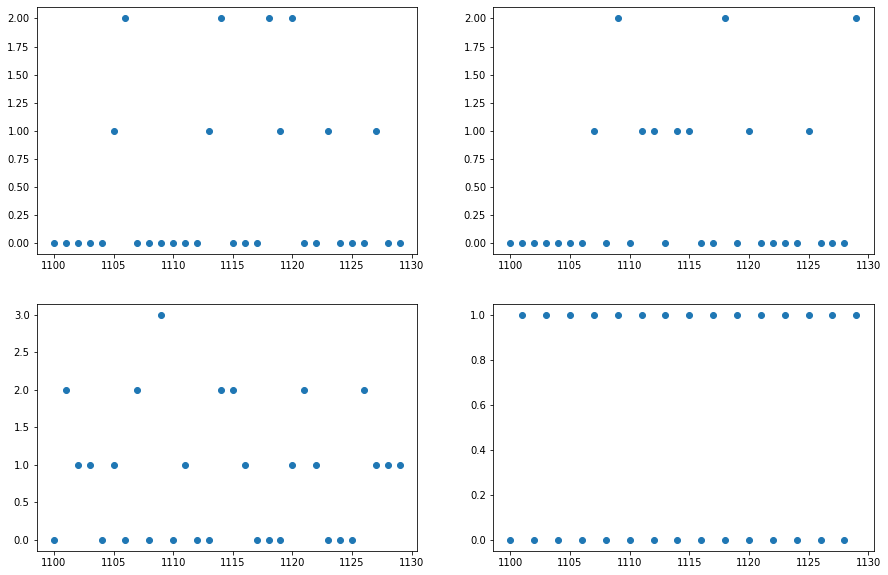

In [174]:
plt.figure(figsize=(15,10))
ax1 = plt.subplot(2,2,1)
ax1.scatter(range(1100,1130),sales("HOBBIES_1_001",0)[1100:1130])
ax2 = plt.subplot(2,2,2)
ax2.scatter(range(1100,1130),sales("HOBBIES_1_001",1)[1100:1130])
ax3 = plt.subplot(2,2,3)
ax3.scatter(range(1100,1130),sales("HOBBIES_1_001",2)[1100:1130])
ax4 = plt.subplot(2,2,4)
ax4.scatter(range(1100,1130),data_event1[1100:1130])

In [0]:
column = ['day','item']

In [0]:
sales_day = pd.DataFrame(columns=column)

In [0]:
sales_day['day'] = data

In [0]:
sales_train_df['item_id'].unique().tolist()

In [0]:
sales_train_df[sales_train_df['item_id']=='HOBBIES_1_001'].iloc[0,6:].index.tolist()

In [0]:
data_item=[]
data = sales_train_df[sales_train_df['item_id']=='HOUSEHOLD_1_001'].iloc[0,6:]
for i in data.index.tolist():
  data_item.append(data[i])

In [0]:
data_item

In [0]:
sales_day['item'] = data_item

In [0]:
sales_day = sales_day.reindex(columns=sales_day.columns.tolist()+['pct_change'])


In [0]:
sales_day['pct_change'] = sales_day['item'].diff()

In [0]:
sales_day.dropna(inplace=True)

In [0]:
sales_day.sort_values('pct_change',inplace=True,ascending=False)

In [90]:
sales_day

,day,item,pct_change
1728,d_1729,4,4.0
1117,d_1118,4,4.0
1808,d_1809,3,3.0
1827,d_1828,3,3.0
1703,d_1704,3,3.0
...,...,...,...
1648,d_1649,0,-3.0
1157,d_1158,0,-3.0
1850,d_1851,0,-3.0
1,d_2,0,-3.0


In [0]:
def total_sales(a,m,n,p):
 if(a['cat_id']=='FOODS'):
    for i in data_days:
      n[i] += a[i]
 if(a['cat_id']=='HOUSEHOLD'):
   for i in data_days:
      m[i] += a[i]
 if(a['cat_id']=='HOBBIES'):
   for i in data_days:
      p[i] += a[i]



In [0]:
sales_train_df.apply(lambda row : total_sales(row,'HOUSEHOLD'),axis=1)

In [0]:
calendar_train

In [0]:
columns_day=calendar_train['weekday'].unique().tolist()

In [0]:
day_sales = {i:0 for i in columns_day}

In [0]:
def weekday(a):
  b = a['weekday']
  day_sales[b]+=dict_days[a['d']]

In [0]:
calendar_train.apply(lambda x:weekday(x),axis=1)

In [0]:
a=day_sales.keys()

In [0]:
np.array(a)

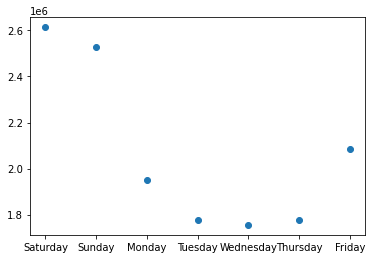

In [146]:
plt.figure(figsize=(6,4))
plt.scatter(day_sales.keys(),day_sales.values(),label='Household')
plt.legend()

Sales of Household items is high over weekends and low on weekdays indicating effect of weekday on sales.

In [147]:
sales_train_df['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [0]:
sales_train_df.apply(lambda row : total_sales(row,'FOODS'),axis=1)

In [0]:
calendar_train.apply(lambda x:weekday(x),axis=1)

In [0]:
day_sales

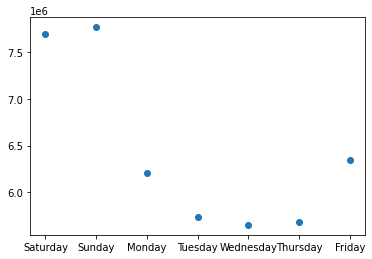

In [154]:
plt.figure(figsize=(6,4))
plt.scatter(day_sales.keys(),day_sales.values())

Sales of Food items is high over weekends and low on weekdays indicating effect of weekday on sales.

In [0]:
sales_train_df.apply(lambda row : total_sales(row,'HOBBIES'),axis=1)

In [0]:
calendar_train.apply(lambda x:weekday(x),axis=1)

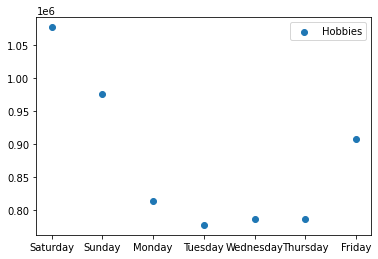

In [169]:
plt.figure(figsize=(6,4))
plt.scatter(day_sales.keys(),day_sales.values(),label='Hobbies')
plt.legend()

Sales of Hobbies items is high over weekends and low on weekdays indicating effect of weekday on sales.

In [0]:
events = calendar_train['event_name_1'].unique().tolist()

In [0]:
events=events[1:]

In [0]:
events_dict = {i:0 for i in events}

In [0]:
def event_sales(a):
  b = a['event_name_1']
  if(b!=0):
    events_dict[b]+=dict_days[a['d']]

In [0]:
calendar_train.apply(lambda x: event_sales(x),axis=1)

In [0]:
events_dict

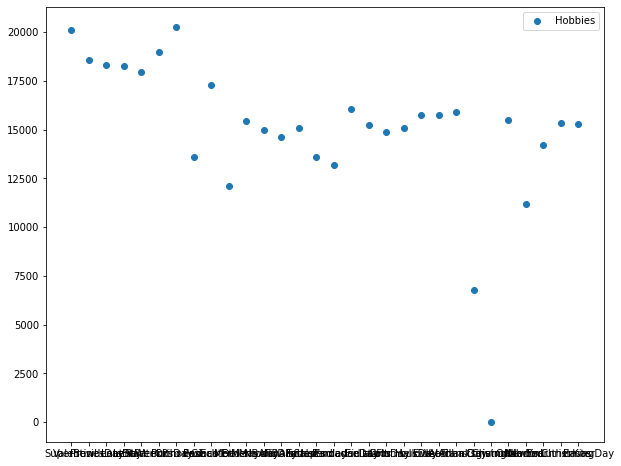

In [189]:
plt.figure(figsize=(10,8))
plt.scatter(events_dict.keys(),events_dict.values(),label='Hobbies')
plt.legend()

In [0]:
count_event=[]
count_normal=[]

In [0]:
def event_sales(a,house,food,hobbie,m,n,o):
  b=a['event_name_1']
  if(b!=0):
    m['event_day']+=house[a['d']]
    n['event_day']+=food[a['d']]
    o['event_day']+=hobbie[a['d']]
    count_event.append(1)
  if(b==0):
    m['normal_day']+=house[a['d']]
    n['normal_day']+=food[a['d']]
    o['normal_day']+=hobbie[a['d']]
    count_normal.append(1)

In [0]:
calendar_train

In [112]:
events_day

{'event_day': 0, 'normal_day': 0}

In [0]:
normalize_sales = {'event_day':0,'normal_day':0}

In [0]:
normalize_sales['event_day'] = events_day['event_day']/len(count_event)
normalize_sales['normal_day'] = events_day['normal_day']/len(count_normal)

In [59]:
normalize_sales

{'event_day': 7022.733766233766, 'normal_day': 7617.492325184764}

In [0]:
calendar_train['event_name_1'].unique()

In [0]:
def event_sales_christmas(a,house,food,hobbie,m,n,o):
  b=a['event_name_1']
  if(b!=0 and b!='Christmas'):
    m['event_day']+=house[a['d']]
    n['event_day']+=food[a['d']]
    o['event_day']+=hobbie[a['d']]
    count_event.append(1)
  if(b==0):
    m['normal_day']+=house[a['d']]
    n['normal_day']+=food[a['d']]
    o['normal_day']+=hobbie[a['d']]
    count_normal.append(1)

In [0]:
calendar_train.apply(lambda x:event_sales_christmas(x,),axis=1)

In [0]:
normalize_sales_chris['event_day'] = events_day['event_day']/len(count_event)
normalize_sales_chris['normal_day'] = events_day['normal_day']/len(count_normal)

In [93]:
normalize_sales_chris

{'event_day': 7258.3892617449665, 'normal_day': 7617.492325184764}

Average sales of hobbies on event day is less than average sales on normal days indicating no effect of events on sales.

In [0]:
dict_days_household = {i:0 for i in data_days}

In [0]:
dict_days_hobbies = {i:0 for i in data_days}

In [0]:
dict_days_food = {i:0 for i in data_days}

In [0]:
sales_train_df.apply(lambda row : total_sales(row,dict_days_household,dict_days_food,dict_days_hobbies),axis=1)

In [0]:
events_day_hobbies = {'event_day':0,'normal_day':0}

In [0]:
events_day_household = {'event_day':0,'normal_day':0}

In [0]:
events_day_food = {'event_day':0,'normal_day':0}

In [0]:
calendar_train.apply(lambda x:event_sales(x,dict_days_household,dict_days_food,dict_days_hobbies,events_day_household,events_day_food,events_day_hobbies),axis=1)

In [0]:
normalize_sales_house = {'event_day':0,'normal_day':0}
normalize_sales_food = {'event_day':0,'normal_day':0}
normalize_sales_hobbie = {'event_day':0,'normal_day':0}

In [0]:
normalize_sales_house['event_day'] = events_day_household['event_day']/len(count_event)
normalize_sales_house['normal_day'] = events_day_household['normal_day']/len(count_normal)
normalize_sales_food['event_day'] = events_day_food['event_day']/len(count_event)
normalize_sales_food['normal_day'] = events_day_food['normal_day']/len(count_normal)
normalize_sales_hobbie['event_day'] = events_day_hobbies['event_day']/len(count_event)
normalize_sales_hobbie['normal_day'] = events_day_hobbies['normal_day']/len(count_normal)

In [137]:
normalize_sales_house

{'event_day': 7022.733766233766, 'normal_day': 7617.492325184764}

In [138]:
normalize_sales_food

{'event_day': 22716.428571428572, 'normal_day': 23645.030699260944}

In [139]:
normalize_sales_hobbie

{'event_day': 2915.987012987013, 'normal_day': 3226.6844798180787}

In [0]:
calendar_train.apply(lambda x:event_sales_christmas(x,dict_days_household,dict_days_food,dict_days_hobbies,events_day_household,events_day_food,events_day_hobbies),axis=1)

In [0]:
normalize_sales_chris_house = {'event_day':0,'normal_day':0}
normalize_sales_chris_food = {'event_day':0,'normal_day':0}
normalize_sales_chris_hobbie = {'event_day':0,'normal_day':0}

In [0]:
normalize_sales_chris_house['event_day'] = events_day_household['event_day']/len(count_event)
normalize_sales_chris_house['normal_day'] = events_day_household['normal_day']/len(count_normal)
normalize_sales_chris_food['event_day'] = events_day_food['event_day']/len(count_event)
normalize_sales_chris_food['normal_day'] = events_day_food['normal_day']/len(count_normal)
normalize_sales_chris_hobbie['event_day'] = events_day_hobbies['event_day']/len(count_event)
normalize_sales_chris_hobbie['normal_day'] = events_day_hobbies['normal_day']/len(count_normal)

In [148]:
normalize_sales_chris_house

{'event_day': 7258.3892617449665, 'normal_day': 7617.492325184764}

In [149]:
normalize_sales_chris_food

{'event_day': 23478.208053691276, 'normal_day': 23645.030699260944}

In [150]:
normalize_sales_chris_hobbie

{'event_day': 3013.8389261744965, 'normal_day': 3226.6844798180787}

In [0]:
pre_event_day_house={'preEvent':0,'normal':0}
pre_event_day_food={'preEvent':0,'normal':0}
pre_event_day_hobbie={'preEvent':0,'normal':0}

In [0]:
count_pre=[]
count_normal=[]
counted_already=[]

In [0]:
def pre_event(a,house,food,hobbie,x,y,z):
  b=a['event_name_1']
  if(b!=0):
    m=a['d']
    n=m.split("_")
    if(int(n[1])>1 and int(n[1])>4):
      for i in range(int(n[1])-1,int(n[1])-4,-1):
        x['preEvent']+=house['d_'+str(i)]
        y['preEvent']+=food['d_'+str(i)]
        z['preEvent']+=hobbie['d_'+str(i)]
        count_pre.append(1)
        counted_already.append('d_'+str(i))
  if(b==0 and a['d'] not in counted_already):
    x['normal']+=house[a['d']]
    y['normal']+=food[a['d']]
    z['normal']+=hobbie[a['d']]
    count_normal.append(1)

In [0]:
calendar_train.apply(lambda x:pre_event(x,dict_days_household,dict_days_food,dict_days_hobbies,pre_event_day_house,pre_event_day_food,pre_event_day_hobbie),axis=1)

In [0]:
normalize_sales_house_pre = {'pre_event_day':0,'normal_day':0}
normalize_sales_food_pre = {'pre_event_day':0,'normal_day':0}
normalize_sales_hobbie_pre = {'pre_event_day':0,'normal_day':0}

In [0]:
normalize_sales_house_pre['pre_event_day'] = pre_event_day_house['preEvent']/len(count_pre)
normalize_sales_house_pre['normal_day'] = pre_event_day_house['normal']/len(count_normal)
normalize_sales_food_pre['pre_event_day'] = pre_event_day_food['preEvent']/len(count_pre)
normalize_sales_food_pre['normal_day'] = pre_event_day_food['normal']/len(count_normal)
normalize_sales_hobbie_pre['pre_event_day'] = pre_event_day_hobbie['preEvent']/len(count_pre)
normalize_sales_hobbie_pre['normal_day'] = pre_event_day_hobbie['normal']/len(count_normal)

In [253]:
normalize_sales_house_pre

{'normal_day': 7617.492325184764, 'pre_event_day': 7816.805194805195}

In [254]:
normalize_sales_food_pre

{'normal_day': 23645.030699260944, 'pre_event_day': 24722.969696969696}

In [255]:
normalize_sales_hobbie_pre

{'normal_day': 3226.6844798180787, 'pre_event_day': 3335.5411255411254}

In [0]:
sales_event_house=[]
sales_event_food=[]
sales_event_hobbie=[]
sales_normal_house=[]
sales_normal_food=[]
sales_normal_hobbie=[]

In [0]:
def pre_event_sales(a,house,food,hobbie,x,y,z,p,q,r):
  b=a['event_name_1']
  if(b!=0):
    m=a['d']
    n=m.split("_")
    if(int(n[1])>3):
      for i in range(int(n[1])-1,int(n[1])-3,-1):
        x.append(house['d_'+str(i)])
        y.append(food['d_'+str(i)])
        z.append(hobbie['d_'+str(i)])
        
        counted_already.append('d_'+str(i))
  if(b==0 and a['d'] not in counted_already):
    p.append(house[a['d']])
    q.append(food[a['d']])
    r.append(hobbie[a['d']])
    

In [0]:
calendar_train.apply(lambda x:pre_event_sales(x,dict_days_household,dict_days_food,dict_days_hobbies,sales_event_house,sales_event_food,sales_event_hobbie,sales_normal_house,sales_normal_food,sales_normal_hobbie),axis=1)

In [302]:
stats.ttest_ind(sales_event_house,sales_normal_house,equal_var=False)

Ttest_indResult(statistic=2.072432030106592, pvalue=0.03869870771626844)

In [303]:
stats.ttest_ind(sales_event_food,sales_normal_food,equal_var=False)

Ttest_indResult(statistic=5.370039091833143, pvalue=1.180318325724673e-07)

In [304]:
stats.ttest_ind(sales_event_hobbie,sales_normal_hobbie,equal_var=False)

Ttest_indResult(statistic=3.7699389041230424, pvalue=0.0001817705764869698)

In [0]:
mean_event=sum(sales_event_house)/len(sales_event_house)

In [0]:
mean_normal=sum(sales_normal_house)/len(sales_normal_house)

In [0]:
std_event = statistics.stdev(sales_event_house)
std_normal = statistics.stdev(sales_normal_house)

In [0]:
a=(std_event**2/len(sales_event_house))+(std_normal**2/len(sales_normal_house))

In [0]:
b=mean_event-mean_normal

In [0]:
c=math.sqrt(a)

In [0]:
b/c

In [0]:
sunday=[]
saturday=[]
monday=[]
Tuesday=[]
Wednesday=[]
Thursday=[]
friday=[]


In [0]:
calendar_train

In [0]:
def weekdays_count(a,n,c,d,e,f,g,h,m):
  b = a['weekday']
  if(b=='Sunday'):
    n.append(m[a['d']])
  if(b=='Monday'):
    c.append(m[a['d']])
  if(b=='Tuesday'):
    d.append(m[a['d']])
  if(b=='Wednesday'):
    e.append(m[a['d']])
  if(b=='Thursday'):
    f.append(m[a['d']])
  if(b=='Friday'):
    g.append(m[a['d']])
  if(b=='Saturday'):
    h.append(m[a['d']])

In [0]:
calendar_train.apply(lambda x:weekdays_count(x,sunday,monday,Tuesday,Wednesday,Thursday,friday,saturday,dict_days_household),axis=1)

In [312]:
stats.f_oneway(sunday,monday,Tuesday,Wednesday,Thursday,friday,saturday)

F_onewayResult(statistic=141.21212323790752, pvalue=2.6164795327585133e-148)

In [0]:
stores = sales_train_df['store_id'].unique().tolist()
stores

In [0]:
store_ca_1 = []

In [0]:
def store_dep(a,c,e):
  data_store = sales_train_df[sales_train_df['store_id']==a]
  b = data_store[data_store['cat_id']==c]
  d=b.iloc[:,6:]
  for i in data_days:
    e.append(sum(d[i]))
  return e

In [0]:
len(data_days)

In [0]:
column=['day','sales']

In [0]:
store_ca_house = pd.DataFrame(columns=column)

In [0]:
store_ca_house['day'] = data_days
store_ca_house['sales'] = store_ca_1

In [0]:
def store_item(a,c,b,m):
  store_item=pd.DataFrame(columns=b)
  (store_item[b[0]],store_item[b[1]]) = (data_days,store_dep(a,c,m)) 
  store_item_sales = {i[1]:i[2] for i in store_item.itertuples()}
  return store_item_sales

In [0]:
def weekday_store_item(a,b,c,d,e,f,g,h):
  calendar_train.apply(lambda x:weekdays_count(x,a,b,c,d,e,f,g,h),axis=1)

In [0]:
(sunday,saturday,monday,tuesday,wednesday,thursday,friday)=([],[],[],[],[],[],[])

In [0]:
sales_store_item = store_item('CA_1','HOUSEHOLD',column,store_ca_1)

In [0]:
weekday_store_item(sunday,monday,tuesday,wednesday,thursday,friday,saturday,sales_store_item)

In [0]:
a=[]
b=[sunday,monday,tuesday,wednesday,thursday,friday,saturday]
for i in b:
  a.append(sum(i))

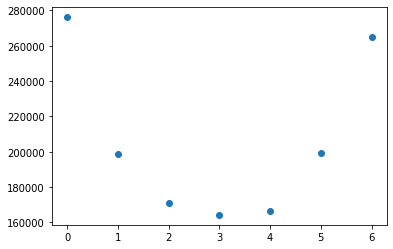

In [88]:
plt.scatter(range(7),a)

In [90]:
stats.f_oneway(sunday,saturday,monday,tuesday,wednesday,thursday,friday)

F_onewayResult(statistic=180.28522974953884, pvalue=5.458417609697598e-182)

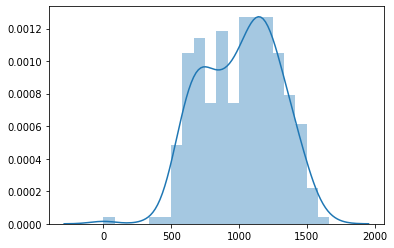

In [91]:
sns.distplot(sunday,bins=20)

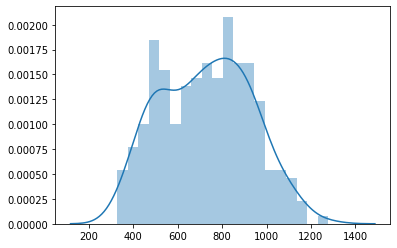

In [92]:
sns.distplot(monday,bins=20)

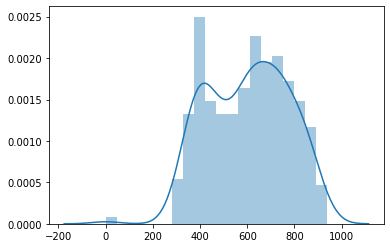

In [93]:
sns.distplot(wednesday,bins=20)

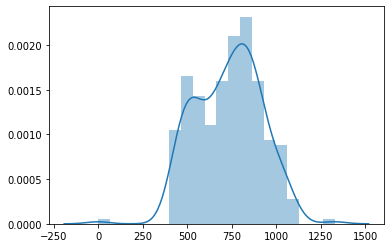

In [94]:
sns.distplot(friday,bins=20)

In [0]:
def pre_event_store(a,y,z,x,p,k):
  b=a['event_name_1']
  
  if(b!=0):
    m=a['d']
    n=m.split("_")
    if(int(n[1])>k):
      for i in range(int(n[1])-1,int(n[1])-k,-1):
        x.append(y['d_'+str(i)])
        
        
        z.append('d_'+str(i))
  if(b==0 and a['d'] not in z):
    p.append(y[a['d']])
  return x,p

In [113]:
for i in range(2,10):
  counter=[]
  sales_event=[]
  sales_normal=[]
  calendar_train.apply(lambda x:pre_event_store(x,sales_store_item,counter,sales_event,sales_normal,i),axis=1)
  print(i,stats.ttest_ind(sales_event,sales_normal,equal_var=True))
  

2 Ttest_indResult(statistic=1.7646028117131285, pvalue=0.07779026407562639)
3 Ttest_indResult(statistic=1.9779327541588294, pvalue=0.04806903602211168)
4 Ttest_indResult(statistic=1.2177723534136127, pvalue=0.22343996778798994)
5 Ttest_indResult(statistic=0.6642763441298901, pvalue=0.506577997578894)
6 Ttest_indResult(statistic=-0.24311872771861384, pvalue=0.8079331559719424)
7 Ttest_indResult(statistic=-1.371035484775751, pvalue=0.17047864772952961)
8 Ttest_indResult(statistic=-1.7511138675316626, pvalue=0.08003444008083208)
9 Ttest_indResult(statistic=-0.9281630753791611, pvalue=0.35339812960612427)


In [0]:
store_ca_food=[]

In [0]:
sales_store_food=store_item('CA_1','FOODS',column,store_ca_food)

In [0]:
def tests(a):
  for i in range(2,10):
    counter=[]
    sales_event=[]
    sales_normal=[]
    calendar_train.apply(lambda x:pre_event_store(x,a,counter,sales_event,sales_normal,i),axis=1)
    print(i,stats.ttest_ind(sales_event,sales_normal,equal_var=True))

In [122]:
tests(sales_store_food)

2 Ttest_indResult(statistic=5.198312986684556, pvalue=2.226019809718375e-07)
3 Ttest_indResult(statistic=5.8631632826340665, pvalue=5.2744513361502e-09)
4 Ttest_indResult(statistic=4.749079544014694, pvalue=2.173925003144479e-06)
5 Ttest_indResult(statistic=3.8217160969063646, pvalue=0.00013593316561740925)
6 Ttest_indResult(statistic=2.361944781377764, pvalue=0.01825478402720322)
7 Ttest_indResult(statistic=0.7938912804475562, pvalue=0.4273289863070058)
8 Ttest_indResult(statistic=0.3375752616510638, pvalue=0.7357082791489007)
9 Ttest_indResult(statistic=1.3174365141564222, pvalue=0.18779359460336842)


In [0]:
store_ca_hobbie=[]
sales_store_hobbie=store_item('CA_1','HOBBIES',column,store_ca_hobbie)

In [126]:
tests(sales_store_hobbie)

2 Ttest_indResult(statistic=2.3067287958461358, pvalue=0.021176430948264994)
3 Ttest_indResult(statistic=3.059426710102123, pvalue=0.002246118144651067)
4 Ttest_indResult(statistic=2.4066008437358652, pvalue=0.016183008808474775)
5 Ttest_indResult(statistic=1.9511212733766115, pvalue=0.05116014978680113)
6 Ttest_indResult(statistic=1.0402013253075961, pvalue=0.2983458879173756)
7 Ttest_indResult(statistic=-0.18467514114277161, pvalue=0.8534978131267766)
8 Ttest_indResult(statistic=-1.2939403796817053, pvalue=0.19579141577491396)
9 Ttest_indResult(statistic=-0.9590588239847474, pvalue=0.3376068892788554)


In [15]:
calendar_train['snap_CA']

array([0, 1])

In [0]:
def snap_sales(a,y,s,m,n):
  b = a['snap_'+s]
  if(b==1):
    m.append(y[a['d']])
  else:
    n.append(y[a['d']])


In [0]:
store_ca=[]

In [0]:
sales_store_ca_food = store_item('CA_1','FOODS',column,store_ca)

In [0]:
sales_snap=[]
sales_normal=[]

In [0]:
calendar_train.apply(lambda x:snap_sales(x,sales_store_ca_food,'CA',sales_snap,sales_normal),axis=1)

In [27]:
stats.ttest_ind(sales_snap,sales_normal,equal_var=False)

Ttest_indResult(statistic=9.910573178454083, pvalue=2.33202280371929e-22)

In [0]:
store_ca_household=[]

In [0]:
sales_store_ca_household = store_item('CA_1','HOUSEHOLD',column,store_ca_household)

In [0]:
sales_snap_house=[]
sales_normal_house=[]

In [0]:
calendar_train.apply(lambda x:snap_sales(x,sales_store_ca_household,'CA',sales_snap_house,sales_normal_house),axis=1)

In [36]:
stats.ttest_ind(sales_snap_house,sales_normal_house,equal_var=True)

Ttest_indResult(statistic=3.052454417975919, pvalue=0.002301057077616091)

In [0]:
store_ca_hobbie=[]

In [0]:
sales_store_ca_hobbie = store_item('CA_1','HOBBIES',column,store_ca_hobbie)

In [0]:
sales_snap_hobbie=[]
sales_normal_hobbie=[]

In [0]:
calendar_train.apply(lambda x:snap_sales(x,sales_store_ca_hobbie,'CA',sales_snap_hobbie,sales_normal_hobbie),axis=1)

In [43]:
stats.ttest_ind(sales_snap_hobbie,sales_normal_hobbie,equal_var=True)

Ttest_indResult(statistic=3.422429752071544, pvalue=0.0006337203630461699)

In [0]:
store_tx_household=[]

In [0]:
sales_tx_household = store_item('TX_1','HOUSEHOLD',column,store_tx_household)

In [0]:
sales_snap_household_tx=[]
sales_normal_household_tx=[]

In [0]:
calendar_train.apply(lambda x:snap_sales(x,sales_tx_household,'TX',sales_snap_household_tx,sales_normal_household_tx),axis=1)

In [37]:
stats.ttest_ind(sales_snap_household_tx,sales_normal_household_tx,equal_var=False)

Ttest_indResult(statistic=2.0629636524747252, pvalue=0.039323844559423636)

In [0]:
store_tx_food=[]

In [0]:
sales_tx_food = store_item('TX_1','FOODS',column,store_tx_food)

In [0]:
sales_snap_food_tx=[]
sales_normal_food_tx=[]

In [0]:
calendar_train.apply(lambda x:snap_sales(x,sales_tx_food,'TX',sales_snap_food_tx,sales_normal_food_tx),axis=1)

In [48]:
stats.ttest_ind(sales_snap_food_tx,sales_normal_food_tx,equal_var=False)

Ttest_indResult(statistic=17.898644682221708, pvalue=3.012731986030727e-64)

In [0]:
store_wi_food=[]

In [0]:
sales_wi_food = store_item('WI_1','FOODS',column,store_wi_food)

In [0]:
sales_snap_food_wi=[]
sales_normal_food_wi=[]

In [0]:
calendar_train.apply(lambda x:snap_sales(x,sales_wi_food,'WI',sales_snap_food_wi,sales_normal_food_wi),axis=1)

In [54]:
stats.ttest_ind(sales_snap_food_wi,sales_normal_food_wi,equal_var=False)

Ttest_indResult(statistic=3.2146123154860105, pvalue=0.0013410436954393523)

In [0]:
store_wi_house=[]

In [0]:
sales_wi_house = store_item('WI_1','HOUSEHOLD',column,store_wi_house)

In [0]:
sales_snap_house_wi=[]
sales_normal_house_wi=[]

In [0]:
calendar_train.apply(lambda x:snap_sales(x,sales_wi_house,'WI',sales_snap_house_wi,sales_normal_house_wi),axis=1)

In [62]:
stats.ttest_ind(sales_snap_house_wi,sales_normal_house_wi,equal_var=False)

Ttest_indResult(statistic=0.8798088482604033, pvalue=0.3791307473590202)

In [0]:
store_wi_hobbie=[]

In [0]:
sales_wi_hobbie = store_item('WI_1','HOBBIES',column,store_wi_hobbie)

In [0]:
sales_snap_hobbie_wi=[]
sales_normal_hobbie_wi=[]

In [0]:
calendar_train.apply(lambda x:snap_sales(x,sales_wi_hobbie,'WI',sales_snap_hobbie_wi,sales_normal_hobbie_wi),axis=1)

In [67]:
stats.ttest_ind(sales_snap_hobbie_wi,sales_normal_hobbie_wi,equal_var=False)

Ttest_indResult(statistic=0.5233458891255773, pvalue=0.6008210275925401)

In [70]:
for i in range(2,10):
  counter=[]
  sales_event=[]
  sales_normal=[]
  calendar_train.apply(lambda x:pre_event_store(x,sales_wi_hobbie,counter,sales_event,sales_normal,i),axis=1)
  print(i,stats.ttest_ind(sales_event,sales_normal,equal_var=True))

2 Ttest_indResult(statistic=3.355019683396371, pvalue=0.0008091170589787031)
3 Ttest_indResult(statistic=4.425474273465133, pvalue=1.012433471610293e-05)
4 Ttest_indResult(statistic=3.454566125264823, pvalue=0.0005615292984663208)
5 Ttest_indResult(statistic=2.8354339775077024, pvalue=0.004615113679631488)
6 Ttest_indResult(statistic=2.336559980310921, pvalue=0.01953984491213715)
7 Ttest_indResult(statistic=0.9752856164732879, pvalue=0.329506591838975)
8 Ttest_indResult(statistic=0.059797475982497725, pvalue=0.9523211505331574)
9 Ttest_indResult(statistic=0.6524633953032768, pvalue=0.5141525873142692)


In [87]:
for i in range(2,10):
  counter=[]
  sales_event=[]
  sales_normal=[]
  calendar_train.apply(lambda x:pre_event_store(x,sales_wi_food,counter,sales_event,sales_normal,i),axis=1)
  print(i,stats.ttest_ind(sales_event,sales_normal,equal_var=True))

2 Ttest_indResult(statistic=2.9733830227114657, pvalue=0.002982224343874872)
3 Ttest_indResult(statistic=3.56728391426782, pvalue=0.0003689171824927014)
4 Ttest_indResult(statistic=3.0096243809435386, pvalue=0.0026451643109776856)
5 Ttest_indResult(statistic=2.566594875699356, pvalue=0.010331082128951228)
6 Ttest_indResult(statistic=1.9877571946883235, pvalue=0.04694630455464324)
7 Ttest_indResult(statistic=1.001624104735868, pvalue=0.3166155664435687)
8 Ttest_indResult(statistic=0.4465111026637243, pvalue=0.6552621978189545)
9 Ttest_indResult(statistic=1.1050037395347732, pvalue=0.26924714607714023)


In [75]:
for i in range(2,10):
  counter=[]
  sales_event=[]
  sales_normal=[]
  calendar_train.apply(lambda x:pre_event_store(x,sales_wi_house,counter,sales_event,sales_normal,i),axis=1)
  print(i,stats.ttest_ind(sales_event,sales_normal,equal_var=True))

2 Ttest_indResult(statistic=2.506155546144367, pvalue=0.012287701564688018)
3 Ttest_indResult(statistic=3.099560943693848, pvalue=0.0019642160222478294)
4 Ttest_indResult(statistic=2.38747641552632, pvalue=0.017047734879682665)
5 Ttest_indResult(statistic=2.0877905495958897, pvalue=0.036923135646915836)
6 Ttest_indResult(statistic=1.5178615015255297, pvalue=0.12917440493356047)
7 Ttest_indResult(statistic=0.19636411299665243, pvalue=0.8443400658267065)
8 Ttest_indResult(statistic=-0.6662017863444115, pvalue=0.5053363368707022)
9 Ttest_indResult(statistic=0.04920994418651758, pvalue=0.9607552832382781)


In [92]:
for i in range(2,10):
  counter=[]
  sales_event=[]
  sales_normal=[]
  calendar_train.apply(lambda x:pre_event_store(x,sales_tx_food,counter,sales_event,sales_normal,i),axis=1)
  print(i,stats.ttest_ind(sales_event,sales_normal,equal_var=True))

2 Ttest_indResult(statistic=5.308437945211881, pvalue=1.234366519797787e-07)
3 Ttest_indResult(statistic=5.645769462781493, pvalue=1.871450007110569e-08)
4 Ttest_indResult(statistic=4.152795693595269, pvalue=3.408620107909705e-05)
5 Ttest_indResult(statistic=3.302392490168577, pvalue=0.0009728591219026856)
6 Ttest_indResult(statistic=1.8841996483514079, pvalue=0.05965267282394571)
7 Ttest_indResult(statistic=0.6814320119824445, pvalue=0.4956570285285815)
8 Ttest_indResult(statistic=0.4184205628255746, pvalue=0.675671348121791)
9 Ttest_indResult(statistic=1.3721517791182505, pvalue=0.17011943453972111)


In [93]:
for i in range(2,10):
  counter=[]
  sales_event=[]
  sales_normal=[]
  calendar_train.apply(lambda x:pre_event_store(x,sales_tx_household,counter,sales_event,sales_normal,i),axis=1)
  print(i,stats.ttest_ind(sales_event,sales_normal,equal_var=True))

2 Ttest_indResult(statistic=3.377314665459677, pvalue=0.0007466499359810518)
3 Ttest_indResult(statistic=3.579724388815157, pvalue=0.00035189553355776797)
4 Ttest_indResult(statistic=2.455159812875151, pvalue=0.014158427261337182)
5 Ttest_indResult(statistic=2.1397312602904766, pvalue=0.03247821317926702)
6 Ttest_indResult(statistic=1.2486095407961684, pvalue=0.21192358338267547)
7 Ttest_indResult(statistic=0.30080702462055703, pvalue=0.7635849764311183)
8 Ttest_indResult(statistic=-0.08854203694836331, pvalue=0.9294521286967573)
9 Ttest_indResult(statistic=0.603465053230362, pvalue=0.5462452699705951)


In [0]:
store_tx_hobbie=[]
sales_tx_hobbie = store_item('TX_1','HOBBIES',column,store_tx_hobbie)

In [96]:
for i in range(2,10):
  counter=[]
  sales_event=[]
  sales_normal=[]
  calendar_train.apply(lambda x:pre_event_store(x,sales_tx_hobbie,counter,sales_event,sales_normal,i),axis=1)
  print(i,stats.ttest_ind(sales_event,sales_normal,equal_var=True))

2 Ttest_indResult(statistic=2.1721033545616972, pvalue=0.029970458843651147)
3 Ttest_indResult(statistic=2.2892624675128683, pvalue=0.022164609539931313)
4 Ttest_indResult(statistic=1.9271293317760263, pvalue=0.05409104675637019)
5 Ttest_indResult(statistic=1.402791282666402, pvalue=0.16080990363360934)
6 Ttest_indResult(statistic=0.673140959005049, pvalue=0.5009191723460337)
7 Ttest_indResult(statistic=-0.007015740747103034, pvalue=0.9944028166677596)
8 Ttest_indResult(statistic=-0.47845287835556305, pvalue=0.6323647994036783)
9 Ttest_indResult(statistic=0.21196805059344692, pvalue=0.8321464509517833)


Events
1. For CA - HouseHold - 2 days
            Food      - 5 days
            Hobbies   - 4 days

2. For TX - HouseHold - 4 days
            Food      - 4 days
            Hobbies   - 2 days

3. For WI - HouseHold - 4 days
            Food      - 5 days
            Hobbies   - 5 days

Snap Sales
1. For CA - HouseHold - yes
            Food      - yes
            Hobbie   - yes

2. For TX - Household - yes
            Food - yes
            Hobbie - no

3. For WI - HouseHold - no
            Food - yes
            Hobbie - no

In [0]:
def post_event_store(a,y,z,x,p,k):
  b=a['event_name_1']
  
  if(b!=0):
    m=a['d']
    n=m.split("_")
    if(int(n[1])<=1914-k):
      for i in range(int(n[1])+1,int(n[1])+k,1):
        x.append(y['d_'+str(i)])
        
        
        z.append('d_'+str(i))
  if(b==0 and a['d'] not in z):
    p.append(y[a['d']])
  return x,p

In [0]:
calendar_train = calendar_train.reindex(columns=calendar_train.columns.tolist()+['number'])

In [0]:
calendar_train['number'] = range(1,1914)

In [0]:
len(calendar_train)

In [0]:
def tests_post(a):
  for i in range(2,30):
    counter=[]
    sales_event=[]
    sales_normal=[]
    calendar_train.apply(lambda x:post_event_store(x,a,counter,sales_event,sales_normal,i),axis=1)
    print(i,stats.ttest_ind(sales_event,sales_normal,equal_var=True))

In [126]:
tests_post(sales_store_item)

2 Ttest_indResult(statistic=-3.0937649536388476, pvalue=0.0020073130140609782)
3 Ttest_indResult(statistic=-3.7664082576229356, pvalue=0.0001709851641991277)
4 Ttest_indResult(statistic=-3.6040436827041717, pvalue=0.00032178187727185226)
5 Ttest_indResult(statistic=-3.7007348935337108, pvalue=0.00022129066554750878)
6 Ttest_indResult(statistic=-2.9360191703253036, pvalue=0.0033648960703091734)
7 Ttest_indResult(statistic=-1.5569235215166406, pvalue=0.11965268271820338)
8 Ttest_indResult(statistic=-1.4279221167372524, pvalue=0.15347110841583161)
9 Ttest_indResult(statistic=-2.303518075264277, pvalue=0.021348997291625323)


In [127]:
tests_post(sales_store_hobbie)

2 Ttest_indResult(statistic=-1.818031788769953, pvalue=0.06922862759749207)
3 Ttest_indResult(statistic=-1.4919735529722387, pvalue=0.13588288292106998)
4 Ttest_indResult(statistic=-1.7723248556133535, pvalue=0.07650892576368329)
5 Ttest_indResult(statistic=-1.7124945163199086, pvalue=0.08697387421353721)
6 Ttest_indResult(statistic=-0.5304297169044117, pvalue=0.5958766386015137)
7 Ttest_indResult(statistic=0.2747806183595771, pvalue=0.7835142147302412)
8 Ttest_indResult(statistic=-0.35765432891445614, pvalue=0.7206399243901374)
9 Ttest_indResult(statistic=-1.029267091984237, pvalue=0.3034751909123321)


In [103]:
tests_post(sales_store_ca_food)

2 Ttest_indResult(statistic=-4.723556639548173, pvalue=2.500702132770237e-06)
3 Ttest_indResult(statistic=-5.754706246353642, pvalue=1.0194325787914014e-08)
4 Ttest_indResult(statistic=-5.667910856107889, pvalue=1.6788316890985973e-08)
5 Ttest_indResult(statistic=-5.40914143640266, pvalue=7.159802323202938e-08)
6 Ttest_indResult(statistic=-4.102272520106129, pvalue=4.265673233278707e-05)
7 Ttest_indResult(statistic=-2.203826361544699, pvalue=0.027654312952227922)
8 Ttest_indResult(statistic=-2.181069475817689, pvalue=0.02929493576701209)
9 Ttest_indResult(statistic=-3.5371064889085977, pvalue=0.0004134962148511252)
10 Ttest_indResult(statistic=-4.651396457859746, pvalue=3.4993048244749096e-06)
11 Ttest_indResult(statistic=-5.259716144535269, pvalue=1.5819973592451917e-07)
12 Ttest_indResult(statistic=-5.360037709514137, pvalue=9.153600990819225e-08)
13 Ttest_indResult(statistic=-3.9089167681896053, pvalue=9.529849943683245e-05)
14 Ttest_indResult(statistic=-2.2027929320421973, pvalue=0

In [141]:
tests_post(sales_tx_household)

2 Ttest_indResult(statistic=-1.8165236854166495, pvalue=0.06945953899626875)
3 Ttest_indResult(statistic=-2.1043261320551987, pvalue=0.03548960220237543)
4 Ttest_indResult(statistic=-1.8917413523711177, pvalue=0.05868503908816342)
5 Ttest_indResult(statistic=-1.819913860032672, pvalue=0.06893435979361358)
6 Ttest_indResult(statistic=-0.8620665251053014, pvalue=0.388760796945518)
7 Ttest_indResult(statistic=0.3261649596061232, pvalue=0.7443349312685195)
8 Ttest_indResult(statistic=0.5327561373990167, pvalue=0.5942618539182548)
9 Ttest_indResult(statistic=-0.3609876707753859, pvalue=0.7181457327740416)


In [142]:
tests_post(sales_tx_food)

2 Ttest_indResult(statistic=-2.988627035246287, pvalue=0.0028410151322510453)
3 Ttest_indResult(statistic=-4.093105555528806, pvalue=4.4463228894039225e-05)
4 Ttest_indResult(statistic=-4.467275120470482, pvalue=8.412318976293655e-06)
5 Ttest_indResult(statistic=-4.75562005965533, pvalue=2.1321640164607567e-06)
6 Ttest_indResult(statistic=-3.753206874559595, pvalue=0.00017988368191120815)
7 Ttest_indResult(statistic=-2.0019637960849743, pvalue=0.04542841294473184)
8 Ttest_indResult(statistic=-1.279282594675988, pvalue=0.20094662615376227)
9 Ttest_indResult(statistic=-2.497384517258326, pvalue=0.012588921465804575)


In [143]:
tests_post(sales_tx_hobbie)

2 Ttest_indResult(statistic=-2.249024909536599, pvalue=0.0246337035833413)
3 Ttest_indResult(statistic=-2.6710395543366907, pvalue=0.007630401225746689)
4 Ttest_indResult(statistic=-2.2293022412780106, pvalue=0.0259161712707205)
5 Ttest_indResult(statistic=-2.458197304111913, pvalue=0.014055119010385137)
6 Ttest_indResult(statistic=-1.6686171675533592, pvalue=0.09535969830565345)
7 Ttest_indResult(statistic=-1.032515760526432, pvalue=0.30195999919193783)
8 Ttest_indResult(statistic=-0.45961563697738633, pvalue=0.6458423133503521)
9 Ttest_indResult(statistic=-1.6212875358217536, pvalue=0.10510924728825995)


In [144]:
tests_post(sales_wi_house)

2 Ttest_indResult(statistic=-2.6687325918964233, pvalue=0.007683495947166212)
3 Ttest_indResult(statistic=-2.606095638702855, pvalue=0.00923430651951711)
4 Ttest_indResult(statistic=-1.8558131988143456, pvalue=0.06364271837650372)
5 Ttest_indResult(statistic=-1.419303868658734, pvalue=0.1559796400543253)
6 Ttest_indResult(statistic=-0.06805172538812751, pvalue=0.9457516915106355)
7 Ttest_indResult(statistic=0.769306769864982, pvalue=0.4418054047736488)
8 Ttest_indResult(statistic=0.5072724600348995, pvalue=0.612019839879755)
9 Ttest_indResult(statistic=-0.3672287494494576, pvalue=0.7134861717055399)


In [145]:
tests_post(sales_wi_food)

2 Ttest_indResult(statistic=-2.5168837041080683, pvalue=0.011927731953576761)
3 Ttest_indResult(statistic=-2.5889962510104074, pvalue=0.009703863544639584)
4 Ttest_indResult(statistic=-2.1259891410990184, pvalue=0.03363926382906131)
5 Ttest_indResult(statistic=-1.9529085789922704, pvalue=0.0509816750973863)
6 Ttest_indResult(statistic=-1.0523897651905603, pvalue=0.29275593394129945)
7 Ttest_indResult(statistic=-0.23135459000048145, pvalue=0.8170638769625502)
8 Ttest_indResult(statistic=-0.2884780856821119, pvalue=0.773010831744374)
9 Ttest_indResult(statistic=-0.7042936883758665, pvalue=0.48132961992979983)


In [146]:
tests_post(sales_wi_hobbie)

2 Ttest_indResult(statistic=-3.5906794983903763, pvalue=0.0003388329691748935)
3 Ttest_indResult(statistic=-2.2621865758945168, pvalue=0.023805732497182597)
4 Ttest_indResult(statistic=-1.571385002830411, pvalue=0.11626812397881188)
5 Ttest_indResult(statistic=-1.8492316403400932, pvalue=0.06458449014809359)
6 Ttest_indResult(statistic=-0.1614120671068029, pvalue=0.8717861975843586)
7 Ttest_indResult(statistic=0.8750301048450881, pvalue=0.38166646034630103)
8 Ttest_indResult(statistic=-0.2989117882170984, pvalue=0.76503854758542)
9 Ttest_indResult(statistic=-1.342736722536292, pvalue=0.17950538632533575)


In [0]:
def pre_snap_sales(a,y,s,z,x,p,k):
  b = a['snap_'+s]
  if(b==1):
    m=a['d']
    n=m.split("_")
    if(int(n[1])>k):
      for i in range(int(n[1])-1,int(n[1])-k,-1):
        
        x.append(y['d_'+str(i)])
        z.append('d_'+str(i))
  if(b==0 and a['d'] not in z):
    p.append(y[a['d']])
  

In [0]:
def tests_pre_snap(a,b):
  for i in range(2,40):
    counter=[]
    sales_snap=[]
    sales_normal=[]
    calendar_train.apply(lambda x:pre_snap_sales(x,a,b,counter,sales_snap,sales_normal,i),axis=1)
    print(i,stats.ttest_ind(sales_snap,sales_normal,equal_var=True))

In [88]:
tests_pre_snap(sales_store_ca_household,'CA')

2 Ttest_indResult(statistic=2.9988599551227275, pvalue=0.0027449065411851077)
3 Ttest_indResult(statistic=3.6370013179338923, pvalue=0.00028131586517376333)
4 Ttest_indResult(statistic=3.8388662850680304, pvalue=0.00012601941795045498)
5 Ttest_indResult(statistic=3.8314707662502854, pvalue=0.0001294413687558842)
6 Ttest_indResult(statistic=3.7423994151880713, pvalue=0.00018458804087480762)
7 Ttest_indResult(statistic=3.6468021136298936, pvalue=0.0002682064867467276)
8 Ttest_indResult(statistic=3.457408804536031, pvalue=0.0005494129445072902)
9 Ttest_indResult(statistic=3.155414992084151, pvalue=0.0016102795318504877)
10 Ttest_indResult(statistic=2.8281514503957657, pvalue=0.004695283497930169)
11 Ttest_indResult(statistic=2.4803326607571736, pvalue=0.013147759763988767)
12 Ttest_indResult(statistic=2.2172565747537507, pvalue=0.026633177444305375)
13 Ttest_indResult(statistic=2.008379709888717, pvalue=0.04463373101008337)
14 Ttest_indResult(statistic=1.8154302167108742, pvalue=0.0694898

In [108]:
tests_pre_snap(sales_store_ca_food,'CA')

2 Ttest_indResult(statistic=8.642651268398676, pvalue=1.1402517892205795e-17)
3 Ttest_indResult(statistic=9.908863887243719, pvalue=9.787551539352045e-23)
4 Ttest_indResult(statistic=9.969287764054014, pvalue=4.526377027231963e-23)
5 Ttest_indResult(statistic=9.49595437966213, pvalue=3.741674261877276e-21)
6 Ttest_indResult(statistic=8.82720808123367, pvalue=1.5205585439129434e-18)
7 Ttest_indResult(statistic=8.101168821066972, pvalue=6.771772048579433e-16)
8 Ttest_indResult(statistic=7.1752299250081135, pvalue=8.146615835916216e-13)
9 Ttest_indResult(statistic=6.230993518608989, pvalue=4.93566288802608e-10)
10 Ttest_indResult(statistic=5.3428873683291895, pvalue=9.440831714602168e-08)
11 Ttest_indResult(statistic=4.5293201376548415, pvalue=6.0088679005418785e-06)
12 Ttest_indResult(statistic=3.8699181527202597, pvalue=0.0001097250972776583)
13 Ttest_indResult(statistic=3.3307024792258946, pvalue=0.0008698689340022375)
14 Ttest_indResult(statistic=2.915455585962057, pvalue=0.0035601386

In [68]:
tests_pre_snap(sales_store_hobbie,'CA')

2 Ttest_indResult(statistic=4.082807440683998, pvalue=4.586935378923426e-05)
3 Ttest_indResult(statistic=4.41647984775476, pvalue=1.036749721288887e-05)
4 Ttest_indResult(statistic=4.470821165031928, pvalue=8.01959266360998e-06)
5 Ttest_indResult(statistic=4.495561632406158, pvalue=7.116208834095468e-06)
6 Ttest_indResult(statistic=4.3921457002449165, pvalue=1.1453635673649703e-05)
7 Ttest_indResult(statistic=4.318845471870053, pvalue=1.5952700862619814e-05)
8 Ttest_indResult(statistic=4.079864915746475, pvalue=4.5619800350787656e-05)
9 Ttest_indResult(statistic=3.747765257622632, pvalue=0.0001798746054910933)
10 Ttest_indResult(statistic=3.390383029448498, pvalue=0.0007015461844718083)
11 Ttest_indResult(statistic=2.9675539491456027, pvalue=0.0030105482761259416)
12 Ttest_indResult(statistic=2.595148492409002, pvalue=0.009470819807388684)
13 Ttest_indResult(statistic=2.288406440255256, pvalue=0.022136090389837913)
14 Ttest_indResult(statistic=2.0988364457286313, pvalue=0.0358564301379

In [0]:
def post_snap_sales(a,y,s,z,x,p,k):
  b = a['snap_'+s]
  if(b==1):
    m=a['d']
    n=m.split("_")
    if(int(n[1])<=1914-k):
      for i in range(int(n[1])-1,int(n[1])+k,1):
        x.append(y['d_'+str(i)])
        z.append('d_'+str(i))
  if(b==0 and a['d'] not in z):
    p.append(y[a['d']])

In [0]:
def test_post_snap(a,b):
  for i in range(2,30):
    counter=[]
    sales_snap=[]
    sales_normal=[]
    calendar_train.apply(lambda x:post_snap_sales(x,a,b,counter,sales_snap,sales_normal,i),axis=1)
    print(i,stats.ttest_ind(sales_snap,sales_normal,equal_var=True))

In [69]:
tests_pre_snap(sales_tx_household,'TX')

2 Ttest_indResult(statistic=1.585206747457708, pvalue=0.11304380079096668)
3 Ttest_indResult(statistic=1.8459411331116908, pvalue=0.06499390428699234)
4 Ttest_indResult(statistic=1.6763126283504906, pvalue=0.09375929653758988)
5 Ttest_indResult(statistic=1.64393041090774, pvalue=0.10026160021661266)
6 Ttest_indResult(statistic=1.5636474200756019, pvalue=0.11796306278167658)
7 Ttest_indResult(statistic=1.5639043935803725, pvalue=0.1178957604897268)
8 Ttest_indResult(statistic=1.2419019175398343, pvalue=0.21431900499042805)
9 Ttest_indResult(statistic=1.2884506593181055, pvalue=0.19763224114637754)
10 Ttest_indResult(statistic=1.1161323983575016, pvalue=0.2644010764052195)
11 Ttest_indResult(statistic=1.1753561509713362, pvalue=0.23988656862070856)
12 Ttest_indResult(statistic=1.1653893344788797, pvalue=0.24389313123529244)
13 Ttest_indResult(statistic=1.1330398015481034, pvalue=0.2572264589891983)
14 Ttest_indResult(statistic=1.0637324862437785, pvalue=0.2874755809714706)
15 Ttest_indRe

In [70]:
tests_pre_snap(sales_tx_food,'TX')

2 Ttest_indResult(statistic=15.37366788569931, pvalue=4.554239745513455e-51)
3 Ttest_indResult(statistic=16.334460816588624, pvalue=1.1899946276589655e-57)
4 Ttest_indResult(statistic=15.110903244495102, pvalue=3.83567264772342e-50)
5 Ttest_indResult(statistic=15.076110425512836, pvalue=4.0077574231822197e-50)
6 Ttest_indResult(statistic=13.99339415377419, pvalue=1.1096497842275345e-43)
7 Ttest_indResult(statistic=13.833872754767867, pvalue=7.838989221312667e-43)
8 Ttest_indResult(statistic=12.320550878728548, pvalue=1.7482171536660998e-34)
9 Ttest_indResult(statistic=11.85893220473236, pvalue=3.956058874399448e-32)
10 Ttest_indResult(statistic=10.80308017766666, pvalue=5.247214152527843e-27)
11 Ttest_indResult(statistic=10.377192737868615, pvalue=4.508506790002443e-25)
12 Ttest_indResult(statistic=9.473181647447237, pvalue=3.427077923931613e-21)
13 Ttest_indResult(statistic=8.838307796843232, pvalue=1.1468496218038468e-18)
14 Ttest_indResult(statistic=7.990442130566232, pvalue=1.49282

In [71]:
tests_pre_snap(sales_tx_hobbie,'TX')

2 Ttest_indResult(statistic=1.1499245861340845, pvalue=0.250283147346628)
3 Ttest_indResult(statistic=1.3142577175877632, pvalue=0.18885454819513345)
4 Ttest_indResult(statistic=1.1056382449492683, pvalue=0.268953178441321)
5 Ttest_indResult(statistic=0.9993398642630933, pvalue=0.31768471146207966)
6 Ttest_indResult(statistic=0.9045337962380813, pvalue=0.3657555791186651)
7 Ttest_indResult(statistic=0.9143268720146022, pvalue=0.36058394591229004)
8 Ttest_indResult(statistic=0.7545476003861448, pvalue=0.45054869091956484)
9 Ttest_indResult(statistic=0.7463138341238796, pvalue=0.4555032272109295)
10 Ttest_indResult(statistic=0.6593378652047732, pvalue=0.5096989925288429)
11 Ttest_indResult(statistic=0.768275881685462, pvalue=0.4423455437600411)
12 Ttest_indResult(statistic=0.756967929839413, pvalue=0.4490894137887048)
13 Ttest_indResult(statistic=0.7437204030614274, pvalue=0.45706424590593175)
14 Ttest_indResult(statistic=0.6859323297461375, pvalue=0.4927716792022536)
15 Ttest_indResult(

In [72]:
tests_pre_snap(sales_wi_food,'WI')

2 Ttest_indResult(statistic=3.0134114153735916, pvalue=0.0026087954880643564)
3 Ttest_indResult(statistic=3.174789493243702, pvalue=0.0015138207550961483)
4 Ttest_indResult(statistic=3.4720354006364214, pvalue=0.0005222845894981861)
5 Ttest_indResult(statistic=3.2195275542931054, pvalue=0.0012932958836042417)
6 Ttest_indResult(statistic=3.0890486715474927, pvalue=0.0020189002131641297)
7 Ttest_indResult(statistic=3.0710481901452042, pvalue=0.0021431788528736735)
8 Ttest_indResult(statistic=2.873709426480413, pvalue=0.004070398013310746)
9 Ttest_indResult(statistic=2.6503927950562103, pvalue=0.008058132866793443)
10 Ttest_indResult(statistic=2.50799274130939, pvalue=0.012162750853357872)
11 Ttest_indResult(statistic=2.4152490157130173, pvalue=0.015746302545432266)
12 Ttest_indResult(statistic=2.2710188605481596, pvalue=0.023169973053630815)
13 Ttest_indResult(statistic=2.120341997501191, pvalue=0.03400335353122148)
14 Ttest_indResult(statistic=2.0342434328848973, pvalue=0.04195338411768

In [73]:
tests_pre_snap(sales_wi_house,'WI')

2 Ttest_indResult(statistic=0.766226726877603, pvalue=0.4436125811042676)
3 Ttest_indResult(statistic=1.110237317693805, pvalue=0.2669809576508976)
4 Ttest_indResult(statistic=1.300891018913395, pvalue=0.1933746171634521)
5 Ttest_indResult(statistic=1.2842307732561498, pvalue=0.1991284376793509)
6 Ttest_indResult(statistic=1.3695106773037387, pvalue=0.17090060669821852)
7 Ttest_indResult(statistic=1.3667024847687477, pvalue=0.1717727005270277)
8 Ttest_indResult(statistic=1.3765884613784156, pvalue=0.1686884630636936)
9 Ttest_indResult(statistic=1.3341637885588087, pvalue=0.18219411852491743)
10 Ttest_indResult(statistic=1.241516206166806, pvalue=0.2144537297748105)
11 Ttest_indResult(statistic=1.3142496775295722, pvalue=0.18879915515929072)
12 Ttest_indResult(statistic=1.3182030212196298, pvalue=0.18747012553215153)
13 Ttest_indResult(statistic=1.248425073834484, pvalue=0.21190654744846332)
14 Ttest_indResult(statistic=1.3116984238968674, pvalue=0.1896520122310024)
15 Ttest_indResult(s

In [74]:
tests_pre_snap(sales_wi_hobbie,'WI')

2 Ttest_indResult(statistic=0.5890684339187412, pvalue=0.5558677312341258)
3 Ttest_indResult(statistic=1.1208982457987988, pvalue=0.26241605773302346)
4 Ttest_indResult(statistic=1.202781527226156, pvalue=0.22913579077757326)
5 Ttest_indResult(statistic=1.0621092054829377, pvalue=0.2882440598509342)
6 Ttest_indResult(statistic=1.1920041174163718, pvalue=0.2333156533301835)
7 Ttest_indResult(statistic=1.1689189909190487, pvalue=0.24248535127094994)
8 Ttest_indResult(statistic=1.0043625351457666, pvalue=0.31524249346735567)
9 Ttest_indResult(statistic=0.9496252173763752, pvalue=0.3423359072288178)
10 Ttest_indResult(statistic=0.8561003400307766, pvalue=0.39196948188132297)
11 Ttest_indResult(statistic=0.8186632921062487, pvalue=0.41300246390293294)
12 Ttest_indResult(statistic=0.8215786315266297, pvalue=0.41133909116515244)
13 Ttest_indResult(statistic=0.7568288989310936, pvalue=0.44917135943775977)
14 Ttest_indResult(statistic=0.732451102553232, pvalue=0.46391043883332594)
15 Ttest_indR

In [77]:
test_post_snap(sales_store_ca_food,'CA')

2 Ttest_indResult(statistic=12.200439377991774, pvalue=2.731371192192084e-33)
3 Ttest_indResult(statistic=13.109959609428092, pvalue=3.073707406658956e-38)
4 Ttest_indResult(statistic=13.312261273995938, pvalue=1.6514064296537297e-39)
5 Ttest_indResult(statistic=13.062783287898332, pvalue=2.987800106378852e-38)
6 Ttest_indResult(statistic=12.685361353066076, pvalue=2.7513400053854127e-36)
7 Ttest_indResult(statistic=12.218687953323847, pvalue=7.012966996680223e-34)
8 Ttest_indResult(statistic=11.56258069699667, pvalue=1.3631871276023e-30)
9 Ttest_indResult(statistic=10.901356585286454, pvalue=1.96835166250206e-27)
10 Ttest_indResult(statistic=10.261614712845676, pvalue=1.5634824263030991e-24)
11 Ttest_indResult(statistic=9.764106207447357, pvalue=2.1743360811897057e-22)
12 Ttest_indResult(statistic=9.30606569985058, pvalue=1.6758886139164125e-20)
13 Ttest_indResult(statistic=8.897775334414375, pvalue=6.843394427036679e-19)
14 Ttest_indResult(statistic=8.523650782040294, pvalue=1.787796

In [78]:
test_post_snap(sales_store_ca_hobbie,'CA')

2 Ttest_indResult(statistic=3.8061715166331953, pvalue=0.00014455432529851078)
3 Ttest_indResult(statistic=3.7493068160449776, pvalue=0.00018062162985958759)
4 Ttest_indResult(statistic=3.28080252666756, pvalue=0.0010449524284527436)
5 Ttest_indResult(statistic=2.9636342937066145, pvalue=0.003057453684923222)
6 Ttest_indResult(statistic=2.7084256703187206, pvalue=0.006784572263497908)
7 Ttest_indResult(statistic=2.8096043123864143, pvalue=0.004978379503815521)
8 Ttest_indResult(statistic=2.536491345108871, pvalue=0.01122259960665718)
9 Ttest_indResult(statistic=2.540394674971574, pvalue=0.011096002701944217)
10 Ttest_indResult(statistic=2.7113881388800083, pvalue=0.006716534814900844)
11 Ttest_indResult(statistic=2.7166827965378504, pvalue=0.00660894128020723)
12 Ttest_indResult(statistic=3.1070278524913104, pvalue=0.0018962846774302812)
13 Ttest_indResult(statistic=3.2763960297461487, pvalue=0.0010555212935906772)
14 Ttest_indResult(statistic=3.559203077142129, pvalue=0.00037384043434

In [91]:
test_post_snap(sales_store_ca_household,'CA')

2 Ttest_indResult(statistic=3.709524579651016, pvalue=0.0002112819145574649)
3 Ttest_indResult(statistic=3.476324971750103, pvalue=0.000514223062948889)
4 Ttest_indResult(statistic=3.1135708819021777, pvalue=0.001860695997848766)
5 Ttest_indResult(statistic=2.742776896227359, pvalue=0.006114769848956617)
6 Ttest_indResult(statistic=2.5356443800584922, pvalue=0.011252153958546438)
7 Ttest_indResult(statistic=2.401331487529967, pvalue=0.016366056775816536)
8 Ttest_indResult(statistic=2.2297981880108484, pvalue=0.02579481460663587)
9 Ttest_indResult(statistic=2.1730770007875817, pvalue=0.029807582699440095)
10 Ttest_indResult(statistic=2.121960690427744, pvalue=0.03387311424179513)
11 Ttest_indResult(statistic=2.296672873085878, pvalue=0.021662491332205904)
12 Ttest_indResult(statistic=2.52373157121913, pvalue=0.011629154700585904)
13 Ttest_indResult(statistic=2.5649710484593204, pvalue=0.010333911877319295)
14 Ttest_indResult(statistic=2.7459923965095063, pvalue=0.006043697659188434)
15 

In [80]:
test_post_snap(sales_tx_food,'TX')

2 Ttest_indResult(statistic=17.372221315463296, pvalue=2.1970150357358942e-63)
3 Ttest_indResult(statistic=18.76236638408732, pvalue=5.676964582570739e-74)
4 Ttest_indResult(statistic=18.061111894680593, pvalue=1.3152268440939322e-69)
5 Ttest_indResult(statistic=18.160202722119706, pvalue=8.675273181258319e-71)
6 Ttest_indResult(statistic=17.551103131104835, pvalue=1.0073081343232763e-66)
7 Ttest_indResult(statistic=17.53102900858542, pvalue=8.012701753325392e-67)
8 Ttest_indResult(statistic=16.64740933966492, pvalue=9.134936225324181e-61)
9 Ttest_indResult(statistic=16.128408277683633, pvalue=2.4065753233183322e-57)
10 Ttest_indResult(statistic=15.323278694237427, pvalue=4.061034882350742e-52)
11 Ttest_indResult(statistic=12.811143285567598, pvalue=3.5830157381587826e-37)
12 Ttest_indResult(statistic=11.750420041466993, pvalue=1.2943742483078223e-31)
13 Ttest_indResult(statistic=10.13490648220176, pvalue=5.317356195649486e-24)
14 Ttest_indResult(statistic=7.874606085550075, pvalue=3.8

In [81]:
test_post_snap(sales_tx_household,'TX')

2 Ttest_indResult(statistic=2.210279677105496, pvalue=0.027190092012350106)
3 Ttest_indResult(statistic=2.293029101324451, pvalue=0.021922018200297145)
4 Ttest_indResult(statistic=2.3012759726741967, pvalue=0.021438122922145173)
5 Ttest_indResult(statistic=2.5296903580399963, pvalue=0.011455750215497105)
6 Ttest_indResult(statistic=2.851905494962924, pvalue=0.0043659160024755676)
7 Ttest_indResult(statistic=3.1767502237419007, pvalue=0.001498418734868346)
8 Ttest_indResult(statistic=3.4266339789823594, pvalue=0.0006155359148252671)
9 Ttest_indResult(statistic=3.8306676873575967, pvalue=0.00012907184593539993)
10 Ttest_indResult(statistic=3.900960117048653, pvalue=9.67496413539082e-05)
11 Ttest_indResult(statistic=2.615074798165479, pvalue=0.008939243953264618)
12 Ttest_indResult(statistic=2.6967376659009346, pvalue=0.007017237959418365)
13 Ttest_indResult(statistic=2.445003126257329, pvalue=0.014505543669894217)
14 Ttest_indResult(statistic=1.9563957043716966, pvalue=0.0504496853946741

In [82]:
test_post_snap(sales_tx_hobbie,'TX')

2 Ttest_indResult(statistic=0.9709779933839612, pvalue=0.33166780126242146)
3 Ttest_indResult(statistic=1.1510013256177432, pvalue=0.24983248993810867)
4 Ttest_indResult(statistic=0.9773467145943814, pvalue=0.3284692384165284)
5 Ttest_indResult(statistic=1.167286844807445, pvalue=0.2431665767440645)
6 Ttest_indResult(statistic=1.250063576634663, pvalue=0.21134233963319876)
7 Ttest_indResult(statistic=1.0575100359754268, pvalue=0.2903299857652166)
8 Ttest_indResult(statistic=1.4538818658153219, pvalue=0.14603545277911717)
9 Ttest_indResult(statistic=1.7064894718853345, pvalue=0.08796761790655594)
10 Ttest_indResult(statistic=1.6359686427053062, pvalue=0.10189312770055733)
11 Ttest_indResult(statistic=0.3623372881811766, pvalue=0.7171105475841983)
12 Ttest_indResult(statistic=1.1150065616636942, pvalue=0.2648818613506703)
13 Ttest_indResult(statistic=1.1706330766560467, pvalue=0.24177959583160863)
14 Ttest_indResult(statistic=0.407945284307973, pvalue=0.6833236267597131)
15 Ttest_indResu

In [83]:
test_post_snap(sales_wi_food,'WI')

2 Ttest_indResult(statistic=3.639681309952524, pvalue=0.00027919543177533216)
3 Ttest_indResult(statistic=3.375060472093505, pvalue=0.0007480750960775642)
4 Ttest_indResult(statistic=3.4280234585563036, pvalue=0.00061530411657599)
5 Ttest_indResult(statistic=3.455578725728493, pvalue=0.0005549309986146147)
6 Ttest_indResult(statistic=3.277523555558279, pvalue=0.0010551794690434944)
7 Ttest_indResult(statistic=3.28305782572513, pvalue=0.0010338482276006655)
8 Ttest_indResult(statistic=3.1812660925299054, pvalue=0.0014742958153103696)
9 Ttest_indResult(statistic=3.129551186080556, pvalue=0.0017588698573848826)
10 Ttest_indResult(statistic=2.9344701468650136, pvalue=0.0033524127302712804)
11 Ttest_indResult(statistic=2.015375634811045, pvalue=0.04390179079901704)
12 Ttest_indResult(statistic=1.5884784989958018, pvalue=0.11221832392637796)
13 Ttest_indResult(statistic=1.2764203512544012, pvalue=0.20184208654193067)
14 Ttest_indResult(statistic=0.6502563001503854, pvalue=0.515543292235499)


In [84]:
test_post_snap(sales_wi_house,'WI')

2 Ttest_indResult(statistic=0.9476714604736539, pvalue=0.34339959857968483)
3 Ttest_indResult(statistic=0.5579445433685395, pvalue=0.5769269712352163)
4 Ttest_indResult(statistic=0.32801488378042154, pvalue=0.7429208468168835)
5 Ttest_indResult(statistic=0.438092865179514, pvalue=0.6613430621193426)
6 Ttest_indResult(statistic=0.2727201543267794, pvalue=0.7850808710458064)
7 Ttest_indResult(statistic=0.21298884290542636, pvalue=0.831344243502996)
8 Ttest_indResult(statistic=0.20635460867929015, pvalue=0.8365213891318718)
9 Ttest_indResult(statistic=0.19962346103837092, pvalue=0.8417816295929492)
10 Ttest_indResult(statistic=-0.02535670687579841, pvalue=0.9797711911221618)
11 Ttest_indResult(statistic=-1.0276547421757158, pvalue=0.3041462245519989)
12 Ttest_indResult(statistic=-1.154100824168138, pvalue=0.2484938581491114)
13 Ttest_indResult(statistic=-1.299842882030988, pvalue=0.19369032343522674)
14 Ttest_indResult(statistic=-1.8478780721950676, pvalue=0.06465280188957884)
15 Ttest_in

In [85]:
test_post_snap(sales_wi_hobbie,'WI')

2 Ttest_indResult(statistic=1.4298684192774747, pvalue=0.1528951214172917)
3 Ttest_indResult(statistic=1.0607633271179049, pvalue=0.28888918996901364)
4 Ttest_indResult(statistic=0.5238172404932907, pvalue=0.6004402085667623)
5 Ttest_indResult(statistic=0.7768392784072103, pvalue=0.4373003891599757)
6 Ttest_indResult(statistic=0.762708668515578, pvalue=0.4456771907395255)
7 Ttest_indResult(statistic=0.7713292239364488, pvalue=0.4405478244345531)
8 Ttest_indResult(statistic=0.6542835149471775, pvalue=0.512955899227369)
9 Ttest_indResult(statistic=0.7062070596611233, pvalue=0.4800859379954686)
10 Ttest_indResult(statistic=0.31948359300477386, pvalue=0.7493697002889221)
11 Ttest_indResult(statistic=-0.5684025765706391, pvalue=0.5697790796160123)
12 Ttest_indResult(statistic=-0.6220724280874625, pvalue=0.5339122533241143)
13 Ttest_indResult(statistic=-1.0391519076382492, pvalue=0.2987638610279403)
14 Ttest_indResult(statistic=-1.5964338334384363, pvalue=0.11042710753456134)
15 Ttest_indRes

In [0]:
calendar_train

In [0]:
def season_sales(a,y,winter,spring,summer,autumn):
  b=a['month']
  if(b in [12,1,2]):
    winter.append(y[a['d']])
  if(b in [3,4,5]):
    spring.append(y[a['d']])
  if(b in [6,7,8]):
    summer.append(y[a['d']])
  else:
    autumn.append(y[a['d']])

In [0]:
def test_season(a):
  winter=[]
  spring=[]
  summer=[]
  autumn=[]
  calendar_train.apply(lambda x:season_sales(x,a,winter,spring,summer,autumn),axis=1)
  print(stats.f_oneway(winter,summer,spring,autumn),statistics.mean(winter),statistics.mean(spring),statistics.mean(summer),statistics.mean(autumn))

In [103]:
test_season(sales_store_ca_household)

F_onewayResult(statistic=10.406610193989405, pvalue=8.261913402439124e-07) 710.2463768115942 740.7417475728155 800.9673913043479 737.9662766689607


In [104]:
test_season(sales_store_ca_food)

F_onewayResult(statistic=10.46504430586066, pvalue=7.595418246548117e-07) 2711.2981366459626 2786.6019417475727 2948.1065217391306 2769.9236063317276


In [105]:
test_season(sales_store_ca_hobbie)

F_onewayResult(statistic=0.6987654202090006, pvalue=0.5527424356501904) 456.51966873706004 461.40388349514564 464.8782608695652 456.1830695113558


In [106]:
test_season(sales_tx_household)

F_onewayResult(statistic=0.15862293559759524, pvalue=0.924150727044782) 718.7287784679089 726.7106796116504 728.1434782608695 724.7439779766001


In [107]:
test_season(sales_tx_food)

F_onewayResult(statistic=22.156256087037377, pvalue=3.4983951994749356e-14) 1894.3105590062112 1970.3223300970874 2094.5521739130436 1937.1748107364074


In [108]:
test_season(sales_tx_hobbie)

F_onewayResult(statistic=2.1761936124099646, pvalue=0.088783976921764) 219.8095238095238 228.126213592233 228.9608695652174 222.82312456985548


In [109]:
test_season(sales_wi_house)

F_onewayResult(statistic=0.1685835900930931, pvalue=0.9176167191900383) 553.3747412008281 555.3533980582524 556.2173913043479 550.0027529249828


In [110]:
test_season(sales_wi_food)

F_onewayResult(statistic=5.881345945063984, pvalue=0.0005333933297760862) 1924.2629399585921 1751.0504854368933 1746.3260869565217 1813.518238128011


In [111]:
test_season(sales_wi_hobbie)

F_onewayResult(statistic=1.0851634770195024, pvalue=0.354064172918927) 348.43064182194615 351.59805825242717 339.29347826086956 343.8547832071576


In [0]:
calendar_train

In [0]:
def month_sales(a,y,j,f,mar,ap,ma,june,july,aug,sep,oc,nov,dec):
  b=a['month']
  if(b==1):
    j.append(y[a['d']])
  if(b==2):
    f.append(y[a['d']])
  if(b==3):
    mar.append(y[a['d']])
  if(b==4):
    ap.append(y[a['d']])
  if(b==5):
    ma.append(y[a['d']])
  if(b==6):
    june.append(y[a['d']])
  if(b==7):
    july.append(y[a['d']])
  if(b==8):
    aug.append(y[a['d']])
  if(b==9):
    sep.append(y[a['d']])
  if(b==10):
    oc.append(y[a['d']])
  if(b==11):
    nov.append(y[a['d']])
  if(b==12):
    dec.append(y[a['d']])

In [0]:
def mean(a):
  return statistics.mean(a)

In [0]:
def test_month(a):
  (january,february,march,april,may,june,july,august,september,october,november,december)=([],[],[],[],[],[],[],[],[],[],[],[])
  calendar_train.apply(lambda x:month_sales(x,a,january,february,march,april,may,june,july,august,september,october,november,december),axis=1)
  print(stats.f_oneway(january,february,march,april,may,june,july,august,september,october,november,december),mean(january),mean(february),mean(march),mean(april),mean(may),mean(june),mean(july),mean(august),mean(september),mean(october),mean(november),mean(december))

In [122]:
test_month(sales_store_ca_household)

F_onewayResult(statistic=3.654852784905799, pvalue=3.753342058900895e-05) 718.0696202531645 718.5941176470589 741.6935483870968 761.2126436781609 716.6193548387097 782.24 800.341935483871 819.7161290322581 790.82 769.2 732.5666666666667 693.1161290322581


In [123]:
test_month(sales_store_ca_food)

F_onewayResult(statistic=3.4626918425437125, pvalue=8.44854330697738e-05) 2716.6835443037976 2715.752941176471 2744.8494623655915 2829.9885057471265 2788 2909.74 2921.6 3011.7419354838707 2909.713333333333 2821.509677419355 2708.34 2700.9225806451614


In [124]:
test_month(sales_store_ca_hobbie)

F_onewayResult(statistic=1.771530772453395, pvalue=0.05374278741738414) 442.99367088607596 466.56470588235294 453.3440860215054 479.8965517241379 450.31612903225806 476.4 459.16129032258067 459.4451612903226 436.64 466.56129032258065 445.99333333333334 459.2903225806452


In [125]:
test_month(sales_tx_household)

F_onewayResult(statistic=2.7587531262820764, pvalue=0.0014858610096733034) 686.9810126582279 767.0411764705882 760.1666666666666 732.1609195402299 680.4451612903226 724.3866666666667 709.5290322580645 750.3935483870968 756.44 719.258064516129 711.3333333333334 698.1032258064516


In [126]:
test_month(sales_tx_food)

F_onewayResult(statistic=7.757744929278501, pvalue=2.8645622092644044e-13) 1886.8544303797469 1912.5235294117647 1932.5483870967741 2006.655172413793 1974.8645161290322 2085.4066666666668 2066.367741935484 2131.5870967741935 2042.9 1951.7870967741935 1840.5666666666666 1881.9354838709678


In [127]:
test_month(sales_tx_hobbie)

F_onewayResult(statistic=2.1321262041274087, pvalue=0.0156928697440056) 211.44303797468353 228.91764705882352 222.48387096774192 234.51149425287358 227.7290322580645 233.06 229.8967741935484 224.05806451612904 210.13333333333333 222.26451612903224 227.58666666666667 218.3483870967742


In [128]:
test_month(sales_wi_house)

F_onewayResult(statistic=2.437284162590174, pvalue=0.0051246811003897485) 557.2594936708861 576.064705882353 582.7795698924731 563.5057471264367 513.2903225806451 538.8733333333333 551.5419354838709 577.6774193548387 551.3533333333334 514.9612903225807 555.6333333333333 524.5290322580645


In [129]:
test_month(sales_wi_food)

F_onewayResult(statistic=2.876594795426382, pvalue=0.0009319244892077187) 1946.9177215189873 1846.729411764706 1812.0967741935483 1766.0172413793102 1660.9935483870968 1771.1 1756.6193548387096 1712.058064516129 1709.5066666666667 1713.425806451613 1878.8333333333333 1986.2064516129033


In [130]:
test_month(sales_wi_hobbie)

F_onewayResult(statistic=2.7154551280218855, pvalue=0.001760859430537447) 338.65822784810126 349.86470588235295 352.2043010752688 362.0057471264368 339.18709677419355 357.7866666666667 337.81935483870967 322.8709677419355 309.74 339.5806451612903 341.06666666666666 356.81935483870967


In [0]:
def sales_days(a,y,m,n,o,p):
  b=a['date']
  c=b.split("-")
  if(1<=int(c[2])<9):
    m.append(y[a['d']])
  if(9<=int(c[2])<17):
    n.append(y[a['d']])
  if(17<=int(c[2])<25):
    o.append(y[a['d']])
  else:
    p.append(y[a['d']])

In [0]:
def test_days(a):
  (first,second,third,fourth) = ([],[],[],[])
  calendar_train.apply(lambda x:sales_days(x,a,first,second,third,fourth),axis=1)
  print(stats.f_oneway(first,second,third,fourth))

In [140]:
test_days(sales_store_ca_household)

F_onewayResult(statistic=2.471897448245173, pvalue=0.05998205002236604)


In [141]:
test_days(sales_store_ca_food)

F_onewayResult(statistic=16.236014271250635, pvalue=1.8256808113447818e-10)


In [142]:
test_days(sales_store_ca_hobbie)

F_onewayResult(statistic=2.8930733908049797, pvalue=0.034049522818021705)


In [143]:
test_days(sales_tx_household)

F_onewayResult(statistic=0.7911841520592814, pvalue=0.49868159692237835)


In [145]:
test_days(sales_tx_food)

F_onewayResult(statistic=31.675886350096928, pvalue=3.8239103133206e-20)


In [146]:
test_days(sales_tx_hobbie)

F_onewayResult(statistic=0.15363720254648075, pvalue=0.9273819443951006)


In [147]:
test_days(sales_wi_house)

F_onewayResult(statistic=0.33417460393025, pvalue=0.8006413783220793)


In [148]:
test_days(sales_wi_food)

F_onewayResult(statistic=1.3290159310087062, pvalue=0.26308752674409586)


In [150]:
test_days(sales_wi_hobbie)

F_onewayResult(statistic=0.54753660865209, pvalue=0.6498080621040208)


In [0]:
year = calendar_train['year'].unique().tolist()

In [0]:
def year_sales(a,y,m,n,o,p,q,r):
  b=a['year']
  if(b==year[0]):
    m.append(y[a['d']])
  if(b==year[1]):
    n.append(y[a['d']])
  if(b==year[2]):
    o.append(y[a['d']])
  if(b==year[3]):
    p.append(y[a['d']])
  if(b==year[4]):
    q.append(y[a['d']])
  if(b==year[5]):
    r.append(y[a['d']])
  

In [0]:
def test_year(a):
  (m,n,o,p,q,r) = ([],[],[],[],[],[])
  calendar_train.apply(lambda x:year_sales(x,a,m,n,o,p,q,r),axis=1)
  print(stats.f_oneway(m,n,o,p,q,r),mean(m),mean(n),mean(o),mean(p),mean(q),mean(r))

In [168]:
test_year(sales_store_ca_household)

F_onewayResult(statistic=308.5122564291048, pvalue=2.3949718784566065e-242) 486.02967359050444 607.5081967213115 779.7397260273973 827.2246575342466 970.827397260274 988.4869565217391


In [169]:
test_year(sales_store_ca_food)

F_onewayResult(statistic=66.84619341751892, pvalue=1.7211767980334215e-64) 2239.207715133531 2869.8224043715845 2973.1753424657536 3018.304109589041 2891.5972602739726 2900.3217391304347


In [170]:
test_year(sales_store_ca_hobbie)

F_onewayResult(statistic=112.67097274731364, pvalue=1.5991610307131034e-104) 422.51632047477744 365.379781420765 462.2630136986301 477.56986301369864 539.9397260273972 525.6


In [171]:
test_year(sales_tx_household)

F_onewayResult(statistic=368.87158385855673, pvalue=5.129057413472617e-277) 444.86053412462905 653.0655737704918 783.3808219178082 751.413698630137 907.4767123287671 935.9130434782609


In [172]:
test_year(sales_tx_food)

F_onewayResult(statistic=30.819685550532547, pvalue=3.0648595501016898e-30) 1741.3857566765578 2067.3251366120217 2021.868493150685 2053.309589041096 1966.4465753424658 1995.895652173913


In [173]:
test_year(sales_tx_hobbie)

F_onewayResult(statistic=154.97680740752804, pvalue=2.167315722008838e-138) 186.32344213649853 187.01639344262296 223.70958904109588 224.21917808219177 280.1890410958904 278.97391304347826


In [174]:
test_year(sales_wi_house)

F_onewayResult(statistic=260.20036692287243, pvalue=2.393042091996528e-212) 372.49554896142433 467.07923497267757 528.4657534246576 595.4246575342465 717.0876712328767 752.8260869565217


In [175]:
test_year(sales_wi_food)

F_onewayResult(statistic=606.9553114533361, pvalue=0.0) 902.5281899109792 1239.4863387978141 1944.676712328767 2204.567123287671 2371.268493150685 2613.573913043478


In [176]:
test_year(sales_wi_hobbie)

F_onewayResult(statistic=68.70487992641657, pvalue=3.4462397315620876e-66) 327.4124629080119 275.3688524590164 324.3753424657534 361.15616438356165 404.586301369863 405.9130434782609


In [0]:
def snap_sales(a,s,y,m,n):
  b=a['snap_'+s]
  if(b==1):
    m.append(y[a['d']])
  else:
    n.append(y[a['d']])

In [0]:
def event_sales(a,y,m,n):
  b=a['event_name_1']
  if(b!=0):
    m.append(y[a['d']])
  else:
    n.append(y[a['d']])

In [0]:
def test_snap(a,b):
  (snap,normal) = ([],[])
  calendar_train.apply(lambda x:snap_sales(x,b,a,snap,normal),axis=1)
  print(stats.ttest_ind(snap,normal,equal_var=False))

In [0]:
def test_event(a):
  (event,normal)=([],[])
  calendar_train.apply(lambda x:event_sales(x,a,event,normal),axis=1)
  print(stats.ttest_ind(event,normal,equal_var=False))

In [41]:
test_event(sales_store_ca_household)

Ttest_indResult(statistic=-2.74011176206507, pvalue=0.006768274954071859)


In [42]:
test_event(sales_store_ca_food)

Ttest_indResult(statistic=-2.210696059450693, pvalue=0.02837305650560974)


In [43]:
test_event(sales_store_ca_hobbie)

Ttest_indResult(statistic=-4.707391312110446, pvalue=5.087987768519336e-06)


In [44]:
test_event(sales_tx_household)

Ttest_indResult(statistic=-1.090210833521166, pvalue=0.277127712528917)


In [45]:
test_event(sales_tx_food)

Ttest_indResult(statistic=0.8059783064652628, pvalue=0.4214087828622609)


In [46]:
test_event(sales_tx_hobbie)

Ttest_indResult(statistic=-1.6824060240044794, pvalue=0.094278888197576)


In [47]:
test_event(sales_wi_food)

Ttest_indResult(statistic=-2.4923640772726787, pvalue=0.01359224002632045)


In [48]:
test_event(sales_wi_house)

Ttest_indResult(statistic=-4.082190480220763, pvalue=6.735888411693606e-05)


In [49]:
test_event(sales_wi_hobbie)

Ttest_indResult(statistic=-5.604643454407631, pvalue=7.588820406055404e-08)


In [51]:
test_snap(sales_store_ca_food,'CA')

Ttest_indResult(statistic=9.910573178454083, pvalue=2.33202280371929e-22)


In [52]:
test_snap(sales_store_ca_household,'CA')

Ttest_indResult(statistic=3.0483536055708225, pvalue=0.0023494694845764886)


In [53]:
test_snap(sales_store_ca_hobbie,'CA')

Ttest_indResult(statistic=3.343155976509487, pvalue=0.0008543719501395245)


In [54]:
test_snap(sales_tx_household,'TX')

Ttest_indResult(statistic=2.0629636524747252, pvalue=0.039323844559423636)


In [55]:
test_snap(sales_tx_food,'TX')

Ttest_indResult(statistic=17.898644682221708, pvalue=3.012731986030727e-64)


In [56]:
test_snap(sales_tx_hobbie,'TX')

Ttest_indResult(statistic=1.5144059912184007, pvalue=0.13017629136509573)


In [57]:
test_snap(sales_wi_house,'WI')

Ttest_indResult(statistic=0.8798088482604033, pvalue=0.3791307473590202)


In [58]:
test_snap(sales_wi_food,'WI')

Ttest_indResult(statistic=3.2146123154860105, pvalue=0.0013410436954393523)


In [60]:
test_snap(sales_wi_hobbie,'WI')

Ttest_indResult(statistic=0.5233458891255773, pvalue=0.6008210275925401)


In [0]:
column_ca_house = ['sales','monday','tuesday','wednesday','thursday','friday','saturday','sunday','is_weekend','is_weekday','summer','spring','winter','autumn','0-8','8-16','16-24','24-','pre_1','pre_2','post_1','post-2','post-3','post-4','post-5','is_event','is_snap','year']

In [0]:
for i in range(1,15):
  column_ca_house.append('pre_snap_'+str(i))
  column_ca_house.append('post_snap_'+str(i))

In [0]:
column_ca_house

In [0]:
column_ca_food = ['sales','monday','tuesday','wednesday','thursday','friday','saturday','sunday','is_weekend','is_weekday','summer','spring','winter','autumn','0-8','8-16','16-24','24-','is_event','is_snap','year']

In [0]:
for i in range(1,27):
  column_ca_food.append('post_event_'+str(i))

In [0]:
for i in range(1,6):
  column_ca_food.append('pre_event_'+str(i))

In [0]:
for i in range(1,19):
  column_ca_food.append('post_snap_'+str(i))

In [0]:
for i in range(1,18):
  column_ca_food.append('pre_snap_'+str(i))

In [0]:
column_ca_food